In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import re

In [8]:
filename = "Flint.pkl"
og_df = pd.read_pickle(filename)
og_df.head(5)

,created_at,followers,hashtagged,location,screen_name,text,verified
id,,,,,,,
688103460634415104,2016-01-15 21:00:24,265,True,"Sugar Land, Texas",zachsciba,RT @TheDailyShow: #FlintWaterCrisis could have...,False
688103392388882433,2016-01-15 21:00:07,968,True,None,scootey,You can thank the Republican party for this #M...,False
688103487205322752,2016-01-15 21:00:30,189,True,"s. pasadena,ca",steve1204,RT @TheDailyShow: #FlintWaterCrisis could have...,False
688103398462205952,2016-01-15 21:00:09,8053,True,"Lansing, Michigan",ProgressMich,Snyder still won’t say when he knew about #Fli...,False
688103509611294721,2016-01-15 21:00:35,7,True,None,marcgilbert77,RT @TheDailyShow: #FlintWaterCrisis could have...,False


In [9]:
tweets = list(og_df['text']) 

In [10]:
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.NUMBER)

def clean_text(input_str):
    input_str = p.clean(input_str)
#     # removes numbers
#     no_numbers_str = re.sub(r'\d+', '', lowercase_str)
#     # removes all punctuation except hashtags
    removelist = "# "
    input_str = re.sub(r'[^\w'+removelist+']', '',input_str)
    input_str = ''.join(i for i in input_str if not i.isdigit())
    input_str = input_str.lower().lstrip()
    return input_str
#     return no_numbers_str

In [11]:
for i in range(0, len(tweets)):
    tweets[i] = clean_text(tweets[i])

In [12]:
og_df['cleaned_tweets'] = tweets

In [13]:
og_df['tokenized'] = og_df['cleaned_tweets'].apply(word_tokenize)
og_df

,created_at,followers,hashtagged,location,screen_name,text,verified,cleaned_tweets,tokenized
id,,,,,,,,,
688103460634415104,2016-01-15 21:00:24,265,True,"Sugar Land, Texas",zachsciba,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve..."
688103392388882433,2016-01-15 21:00:07,968,True,None,scootey,You can thank the Republican party for this #M...,False,you can thank the republican party for this #m...,"[you, can, thank, the, republican, party, for,..."
688103487205322752,2016-01-15 21:00:30,189,True,"s. pasadena,ca",steve1204,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve..."
688103398462205952,2016-01-15 21:00:09,8053,True,"Lansing, Michigan",ProgressMich,Snyder still won’t say when he knew about #Fli...,False,snyder still wont say when he knew about #flin...,"[snyder, still, wont, say, when, he, knew, abo..."
688103509611294721,2016-01-15 21:00:35,7,True,None,marcgilbert77,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve..."
...,...,...,...,...,...,...,...,...,...
748186745464721408,2016-06-29 16:09:55,1426,False,"Wales, UK",Jobs_Wales_,"#Job #Wales Credit Control: WA-Flintshire, Cre...",False,#job #wales credit control waflintshire credit...,"[#, job, #, wales, credit, control, waflintshi..."
748186954479460352,2016-06-29 16:10:45,787,False,Classified,Jesmilia,@jim72182 @realDonaldTrump Fact every State De...,False,fact every state democrats manage is bankrupt ...,"[fact, every, state, democrats, manage, is, ba..."
748187197862469632,2016-06-29 16:11:43,367,False,on your mind,qimmah_5,RT @NewYorker: The residents of Flint describe...,False,the residents of flint describe how the water ...,"[the, residents, of, flint, describe, how, the..."


In [14]:
from nltk.corpus import stopwords, wordnet

stop_words = set(stopwords.words('english'))
og_df['stopwords_removed'] = og_df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
og_df

,created_at,followers,hashtagged,location,screen_name,text,verified,cleaned_tweets,tokenized,stopwords_removed
id,,,,,,,,,,
688103460634415104,2016-01-15 21:00:24,265,True,"Sugar Land, Texas",zachsciba,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ..."
688103392388882433,2016-01-15 21:00:07,968,True,None,scootey,You can thank the Republican party for this #M...,False,you can thank the republican party for this #m...,"[you, can, thank, the, republican, party, for,...","[thank, republican, party, #, michigan, #, fli..."
688103487205322752,2016-01-15 21:00:30,189,True,"s. pasadena,ca",steve1204,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ..."
688103398462205952,2016-01-15 21:00:09,8053,True,"Lansing, Michigan",ProgressMich,Snyder still won’t say when he knew about #Fli...,False,snyder still wont say when he knew about #flin...,"[snyder, still, wont, say, when, he, knew, abo...","[snyder, still, wont, say, knew, #, flintwater..."
688103509611294721,2016-01-15 21:00:35,7,True,None,marcgilbert77,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ..."
...,...,...,...,...,...,...,...,...,...,...
748186745464721408,2016-06-29 16:09:55,1426,False,"Wales, UK",Jobs_Wales_,"#Job #Wales Credit Control: WA-Flintshire, Cre...",False,#job #wales credit control waflintshire credit...,"[#, job, #, wales, credit, control, waflintshi...","[#, job, #, wales, credit, control, waflintshi..."
748186954479460352,2016-06-29 16:10:45,787,False,Classified,Jesmilia,@jim72182 @realDonaldTrump Fact every State De...,False,fact every state democrats manage is bankrupt ...,"[fact, every, state, democrats, manage, is, ba...","[fact, every, state, democrats, manage, bankru..."
748187197862469632,2016-06-29 16:11:43,367,False,on your mind,qimmah_5,RT @NewYorker: The residents of Flint describe...,False,the residents of flint describe how the water ...,"[the, residents, of, flint, describe, how, the...","[residents, flint, describe, water, crisis, to..."


In [15]:
og_df['pos_tags'] = og_df['stopwords_removed'].apply(nltk.tag.pos_tag)

In [16]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [17]:
og_df['wordnet_pos'] = og_df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
og_df

,created_at,followers,hashtagged,location,screen_name,text,verified,cleaned_tweets,tokenized,stopwords_removed,pos_tags,wordnet_pos
id,,,,,,,,,,,,
688103460634415104,2016-01-15 21:00:24,265,True,"Sugar Land, Texas",zachsciba,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p..."
688103392388882433,2016-01-15 21:00:07,968,True,None,scootey,You can thank the Republican party for this #M...,False,you can thank the republican party for this #m...,"[you, can, thank, the, republican, party, for,...","[thank, republican, party, #, michigan, #, fli...","[(thank, JJ), (republican, JJ), (party, NN), (...","[(thank, a), (republican, a), (party, n), (#, ..."
688103487205322752,2016-01-15 21:00:30,189,True,"s. pasadena,ca",steve1204,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p..."
688103398462205952,2016-01-15 21:00:09,8053,True,"Lansing, Michigan",ProgressMich,Snyder still won’t say when he knew about #Fli...,False,snyder still wont say when he knew about #flin...,"[snyder, still, wont, say, when, he, knew, abo...","[snyder, still, wont, say, knew, #, flintwater...","[(snyder, NN), (still, RB), (wont, JJ), (say, ...","[(snyder, n), (still, r), (wont, a), (say, v),..."
688103509611294721,2016-01-15 21:00:35,7,True,None,marcgilbert77,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p..."
...,...,...,...,...,...,...,...,...,...,...,...,...
748186745464721408,2016-06-29 16:09:55,1426,False,"Wales, UK",Jobs_Wales_,"#Job #Wales Credit Control: WA-Flintshire, Cre...",False,#job #wales credit control waflintshire credit...,"[#, job, #, wales, credit, control, waflintshi...","[#, job, #, wales, credit, control, waflintshi...","[(#, #), (job, NN), (#, #), (wales, NNS), (cre...","[(#, n), (job, n), (#, n), (wales, n), (credit..."
748186954479460352,2016-06-29 16:10:45,787,False,Classified,Jesmilia,@jim72182 @realDonaldTrump Fact every State De...,False,fact every state democrats manage is bankrupt ...,"[fact, every, state, democrats, manage, is, ba...","[fact, every, state, democrats, manage, bankru...","[(fact, NN), (every, DT), (state, NN), (democr...","[(fact, n), (every, n), (state, n), (democrats..."
748187197862469632,2016-06-29 16:11:43,367,False,on your mind,qimmah_5,RT @NewYorker: The residents of Flint describe...,False,the residents of flint describe how the water ...,"[the, residents, of, flint, describe, how, the...","[residents, flint, describe, water, crisis, to...","[(residents, NNS), (flint, VBP), (describe, JJ...","[(residents, n), (flint, v), (describe, a), (w..."


In [18]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
og_df['lemmatized'] = og_df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
og_df

,created_at,followers,hashtagged,location,screen_name,text,verified,cleaned_tweets,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized
id,,,,,,,,,,,,,
688103460634415104,2016-01-15 21:00:24,265,True,"Sugar Land, Texas",zachsciba,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da..."
688103392388882433,2016-01-15 21:00:07,968,True,None,scootey,You can thank the Republican party for this #M...,False,you can thank the republican party for this #m...,"[you, can, thank, the, republican, party, for,...","[thank, republican, party, #, michigan, #, fli...","[(thank, JJ), (republican, JJ), (party, NN), (...","[(thank, a), (republican, a), (party, n), (#, ...","[thank, republican, party, #, michigan, #, fli..."
688103487205322752,2016-01-15 21:00:30,189,True,"s. pasadena,ca",steve1204,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da..."
688103398462205952,2016-01-15 21:00:09,8053,True,"Lansing, Michigan",ProgressMich,Snyder still won’t say when he knew about #Fli...,False,snyder still wont say when he knew about #flin...,"[snyder, still, wont, say, when, he, knew, abo...","[snyder, still, wont, say, knew, #, flintwater...","[(snyder, NN), (still, RB), (wont, JJ), (say, ...","[(snyder, n), (still, r), (wont, a), (say, v),...","[snyder, still, wont, say, knew, #, flintwater..."
688103509611294721,2016-01-15 21:00:35,7,True,None,marcgilbert77,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
748186745464721408,2016-06-29 16:09:55,1426,False,"Wales, UK",Jobs_Wales_,"#Job #Wales Credit Control: WA-Flintshire, Cre...",False,#job #wales credit control waflintshire credit...,"[#, job, #, wales, credit, control, waflintshi...","[#, job, #, wales, credit, control, waflintshi...","[(#, #), (job, NN), (#, #), (wales, NNS), (cre...","[(#, n), (job, n), (#, n), (wales, n), (credit...","[#, job, #, wale, credit, control, waflintshir..."
748186954479460352,2016-06-29 16:10:45,787,False,Classified,Jesmilia,@jim72182 @realDonaldTrump Fact every State De...,False,fact every state democrats manage is bankrupt ...,"[fact, every, state, democrats, manage, is, ba...","[fact, every, state, democrats, manage, bankru...","[(fact, NN), (every, DT), (state, NN), (democr...","[(fact, n), (every, n), (state, n), (democrats...","[fact, every, state, democrat, manage, bankrup..."
748187197862469632,2016-06-29 16:11:43,367,False,on your mind,qimmah_5,RT @NewYorker: The residents of Flint describe...,False,the residents of flint describe how the water ...,"[the, residents, of, flint, describe, how, the...","[residents, flint, describe, water, crisis, to...","[(residents, NNS), (flint, VBP), (describe, JJ...","[(residents, n), (flint, v), (describe, a), (w...","[resident, flint, describe, water, crisis, tou..."


In [19]:
og_df.to_pickle('df_clean.pkl')

<h2>Sentiment Analysis

In [2]:
cleaned_df = pd.read_pickle('df_clean.pkl')

In [3]:
cleaned_df['lemma_str'] = [' '.join(map(str, l)) for l in cleaned_df['lemmatized']]

In [4]:
cleaned_df['sentiment'] = cleaned_df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [5]:
cleaned_df.head(5)

,created_at,followers,hashtagged,location,screen_name,text,verified,cleaned_tweets,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,sentiment
id,,,,,,,,,,,,,,,
688103460634415104,2016-01-15 21:00:24,265,True,"Sugar Land, Texas",zachsciba,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da...",# flintwatercrisis could prevent easy day solu...,0.433333
688103392388882433,2016-01-15 21:00:07,968,True,None,scootey,You can thank the Republican party for this #M...,False,you can thank the republican party for this #m...,"[you, can, thank, the, republican, party, for,...","[thank, republican, party, #, michigan, #, fli...","[(thank, JJ), (republican, JJ), (party, NN), (...","[(thank, a), (republican, a), (party, n), (#, ...","[thank, republican, party, #, michigan, #, fli...",thank republican party # michigan # flintwater...,0.000000
688103487205322752,2016-01-15 21:00:30,189,True,"s. pasadena,ca",steve1204,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da...",# flintwatercrisis could prevent easy day solu...,0.433333
688103398462205952,2016-01-15 21:00:09,8053,True,"Lansing, Michigan",ProgressMich,Snyder still won’t say when he knew about #Fli...,False,snyder still wont say when he knew about #flin...,"[snyder, still, wont, say, when, he, knew, abo...","[snyder, still, wont, say, knew, #, flintwater...","[(snyder, NN), (still, RB), (wont, JJ), (say, ...","[(snyder, n), (still, r), (wont, a), (say, v),...","[snyder, still, wont, say, knew, #, flintwater...",snyder still wont say knew # flintwatercrisis ...,0.000000
688103509611294721,2016-01-15 21:00:35,7,True,None,marcgilbert77,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da...",# flintwatercrisis could prevent easy day solu...,0.433333


In [6]:
# install vader
# use the apply formula like above
# write to new column in dataframe
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def calculate_vader_sentiment_score(tweets):
    sentiment_scores = []
    for i in range(0, len(tweets)):
        vs = analyzer.polarity_scores(tweets[i])
        sentiment_scores.append(vs['compound'])
#         print("TWEET: ", tweets[i])
#         print("SCORE: ", vs['compound'])
#         print("\n")
    
    return sentiment_scores

In [7]:
lemmatized_tweets = list(cleaned_df['lemma_str'])
cleaned_df['lemmatized_sentiment_vader_score'] = calculate_vader_sentiment_score(lemmatized_tweets)

In [8]:
dirty_tweets = list(cleaned_df['cleaned_tweets'])
cleaned_df['cleaned_tweets_sentiment_vader_score'] = calculate_vader_sentiment_score(dirty_tweets)

In [9]:
original_tweets = cleaned_df['text']
cleaned_df['original_tweets_vader_sentiment_score'] = calculate_vader_sentiment_score(original_tweets)

In [10]:
cleaned_df.head(25)

,created_at,followers,hashtagged,location,screen_name,text,verified,cleaned_tweets,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,sentiment,lemmatized_sentiment_vader_score,cleaned_tweets_sentiment_vader_score,original_tweets_vader_sentiment_score
id,,,,,,,,,,,,,,,,,,
688103460634415104,2016-01-15 21:00:24,265,True,"Sugar Land, Texas",zachsciba,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da...",# flintwatercrisis could prevent easy day solu...,0.433333,0.6486,0.6486,0.6486
688103392388882433,2016-01-15 21:00:07,968,True,None,scootey,You can thank the Republican party for this #M...,False,you can thank the republican party for this #m...,"[you, can, thank, the, republican, party, for,...","[thank, republican, party, #, michigan, #, fli...","[(thank, JJ), (republican, JJ), (party, NN), (...","[(thank, a), (republican, a), (party, n), (#, ...","[thank, republican, party, #, michigan, #, fli...",thank republican party # michigan # flintwater...,0.000000,0.6369,0.6369,0.6369
688103487205322752,2016-01-15 21:00:30,189,True,"s. pasadena,ca",steve1204,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da...",# flintwatercrisis could prevent easy day solu...,0.433333,0.6486,0.6486,0.6486
688103398462205952,2016-01-15 21:00:09,8053,True,"Lansing, Michigan",ProgressMich,Snyder still won’t say when he knew about #Fli...,False,snyder still wont say when he knew about #flin...,"[snyder, still, wont, say, when, he, knew, abo...","[snyder, still, wont, say, knew, #, flintwater...","[(snyder, NN), (still, RB), (wont, JJ), (say, ...","[(snyder, n), (still, r), (wont, a), (say, v),...","[snyder, still, wont, say, knew, #, flintwater...",snyder still wont say knew # flintwatercrisis ...,0.000000,-0.3612,-0.3612,-0.3612
688103509611294721,2016-01-15 21:00:35,7,True,None,marcgilbert77,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da...",# flintwatercrisis could prevent easy day solu...,0.433333,0.6486,0.6486,0.6486
688103421811896321,2016-01-15 21:00:14,589,False,None,porridgeisgood,RT @democracynow: Flint Doctor @MonaHannaA on ...,False,flint doctor on how she fought govt denials to...,"[flint, doctor, on, how, she, fought, govt, de...","[flint, doctor, fought, govt, denials, expose,...","[(flint, NN), (doctor, NN), (fought, VBD), (go...","[(flint, n), (doctor, n), (fought, v), (govt, ...","[flint, doctor, fight, govt, denial, expose, p...",flint doctor fight govt denial expose poison c...,0.000000,-0.7717,-0.7717,-0.7717
688103585373016066,2016-01-15 21:00:53,4323,False,In own world,winn1_winn,RT @coton_luver: #RickSnyder Flint Republicans...,False,#ricksnyder flint republicans r sending shutof...,"[#, ricksnyder, flint, republicans, r, sending...","[#, ricksnyder, flint, republicans, r, sending...","[(#, #), (ricksnyder, NN), (flint, NN), (repub...","[(#, n), (ricksnyder, n), (flint, n), (republi...","[#, ricksnyder, flint, republicans, r, send, s...",# ricksnyder flint republicans r send shutoff ...,0.000000,-0.5423,-0.5859,-0.5859
688103437460885505,2016-01-15 21:00:18,1,True,None,JCIBurtonArea,Help us 

<h2>Term Frequency

In [11]:
def get_all_words(df):
    words = df['lemmatized']
    allwords = []
    for wordlist in words:
        for word in wordlist:
            if word != '#' and "flintwatercrisis" not in word and "flint" not in word and "crisis" not in word and "water" not in word and "michigan" not in word and "http" not in word:
                allwords.append(word)
    return allwords

In [12]:
def create_word_cloud(df):
    allwords = get_all_words(df)
    mostcommon = FreqDist(allwords).most_common(100)
    wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
    fig = plt.figure(figsize=(30, 10), facecolor='white')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Top 100 Most Common Words', fontsize=100)

    plt.tight_layout(pad=0)
    plt.show()

In [13]:
all_sentiment_df = cleaned_df
positive_sentiment_df = cleaned_df[cleaned_df['lemmatized_sentiment_vader_score'] >= 0.05]
negative_sentiment_df = cleaned_df[cleaned_df['lemmatized_sentiment_vader_score'] <= 0.05]
neutral_sentiment_df = cleaned_df[(cleaned_df['lemmatized_sentiment_vader_score'] < 0.05) & (cleaned_df['lemmatized_sentiment_vader_score'] > -.05)]

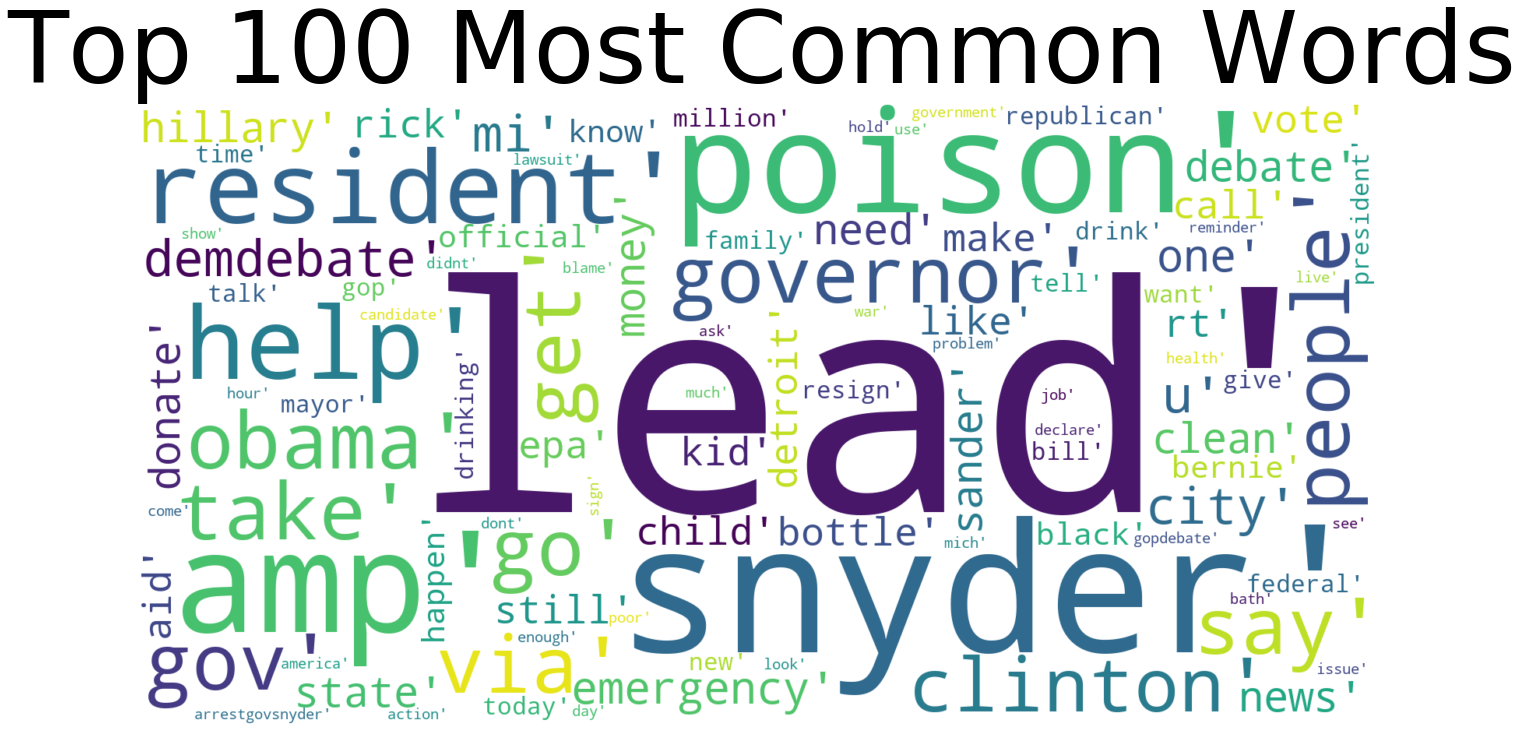

In [14]:
create_word_cloud(all_sentiment_df)

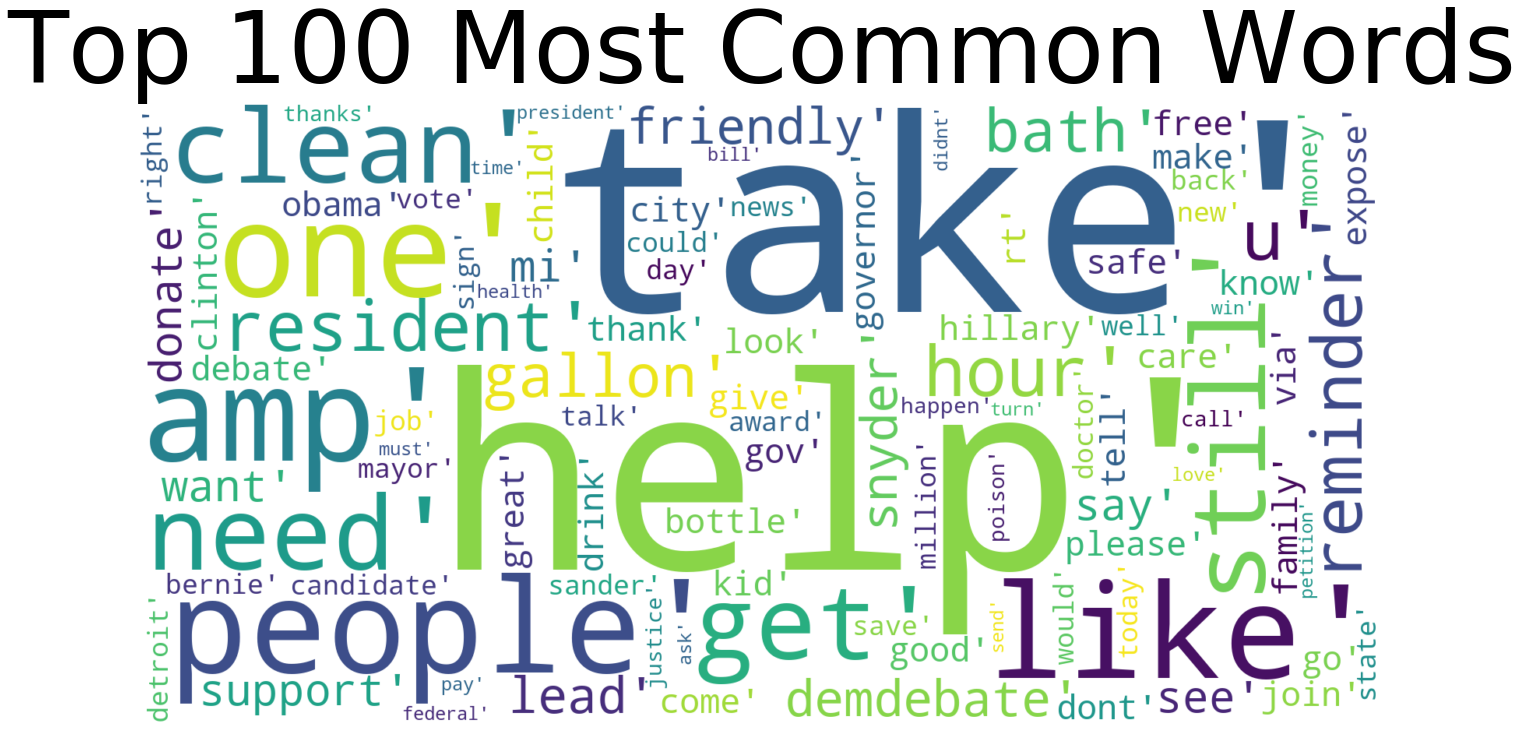

In [15]:
create_word_cloud(positive_sentiment_df)

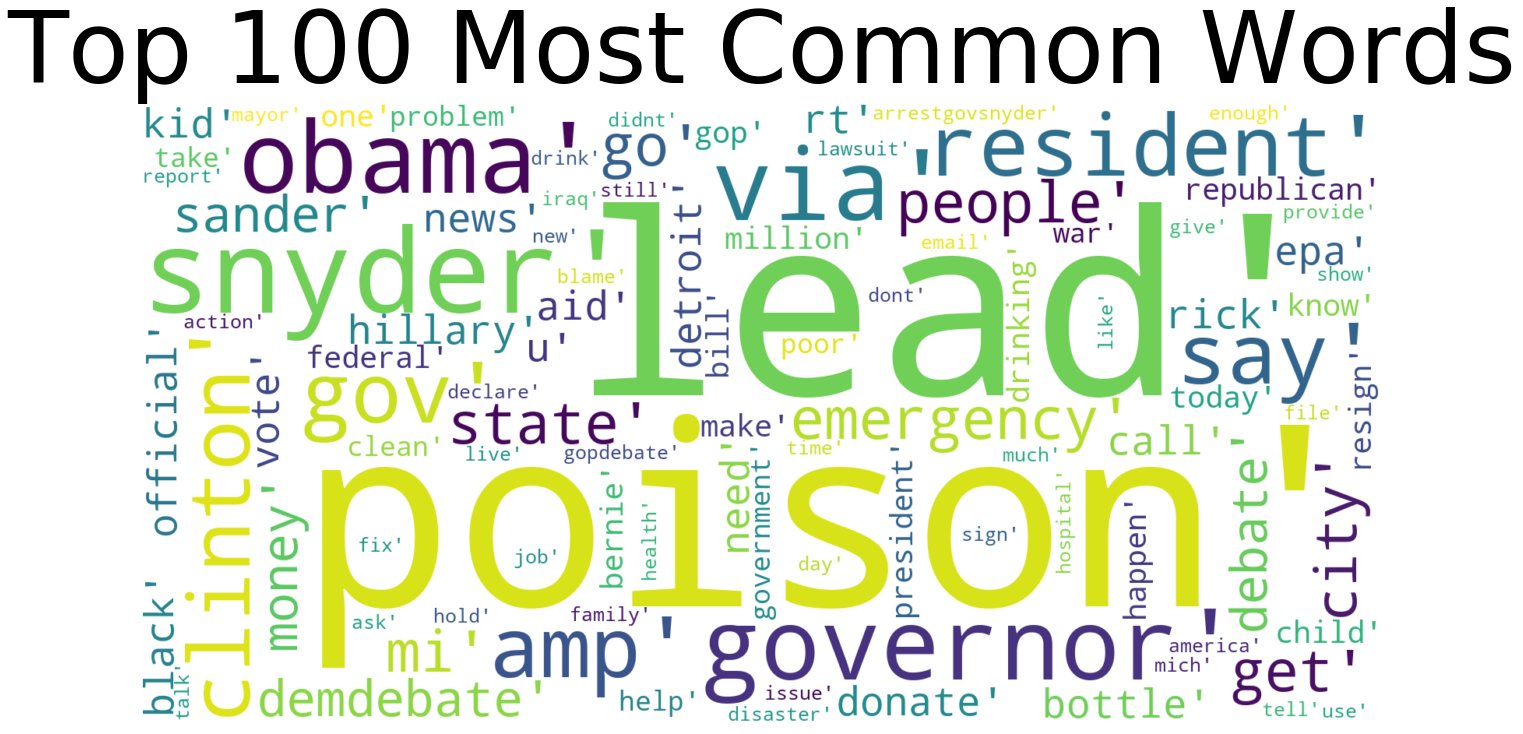

In [16]:
create_word_cloud(negative_sentiment_df)

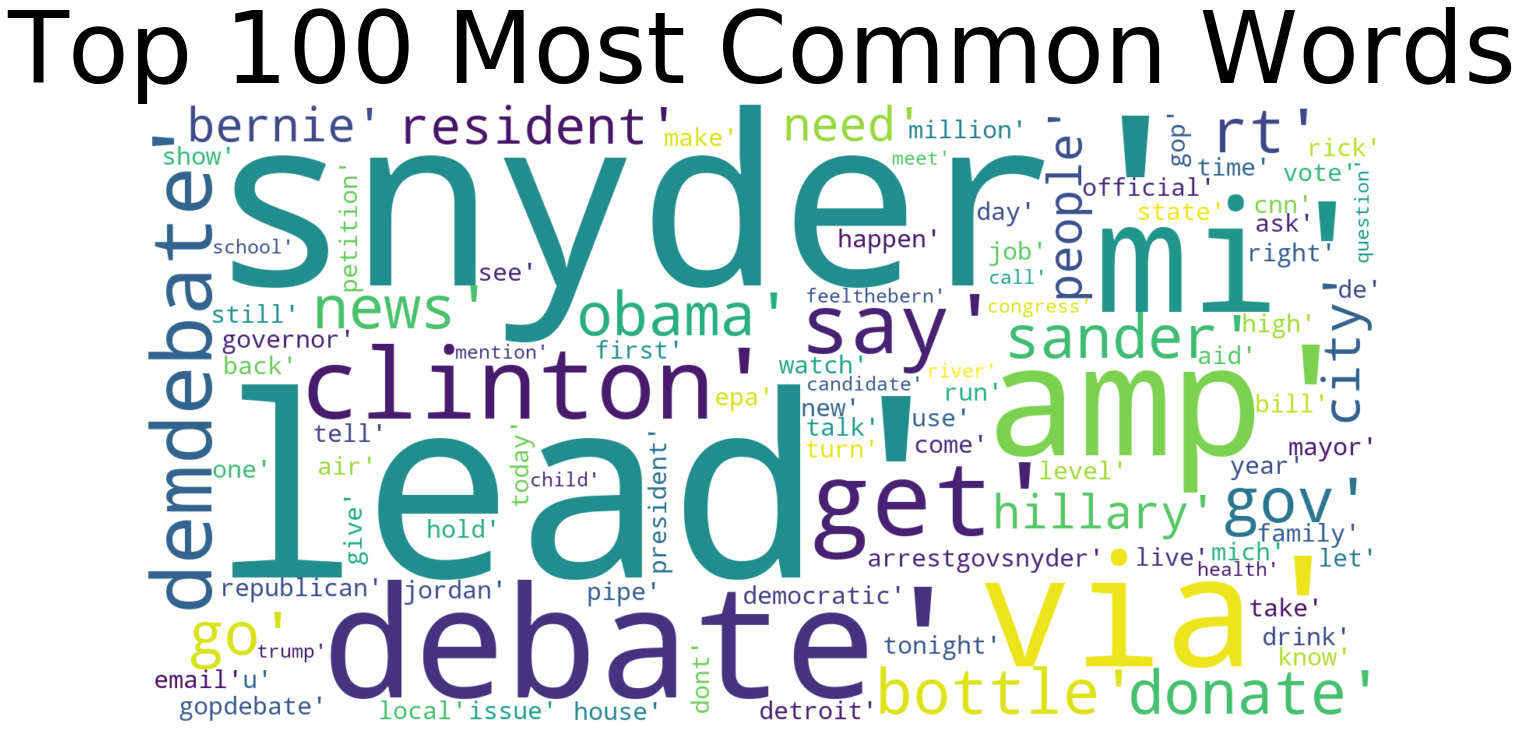

In [17]:
create_word_cloud(neutral_sentiment_df)

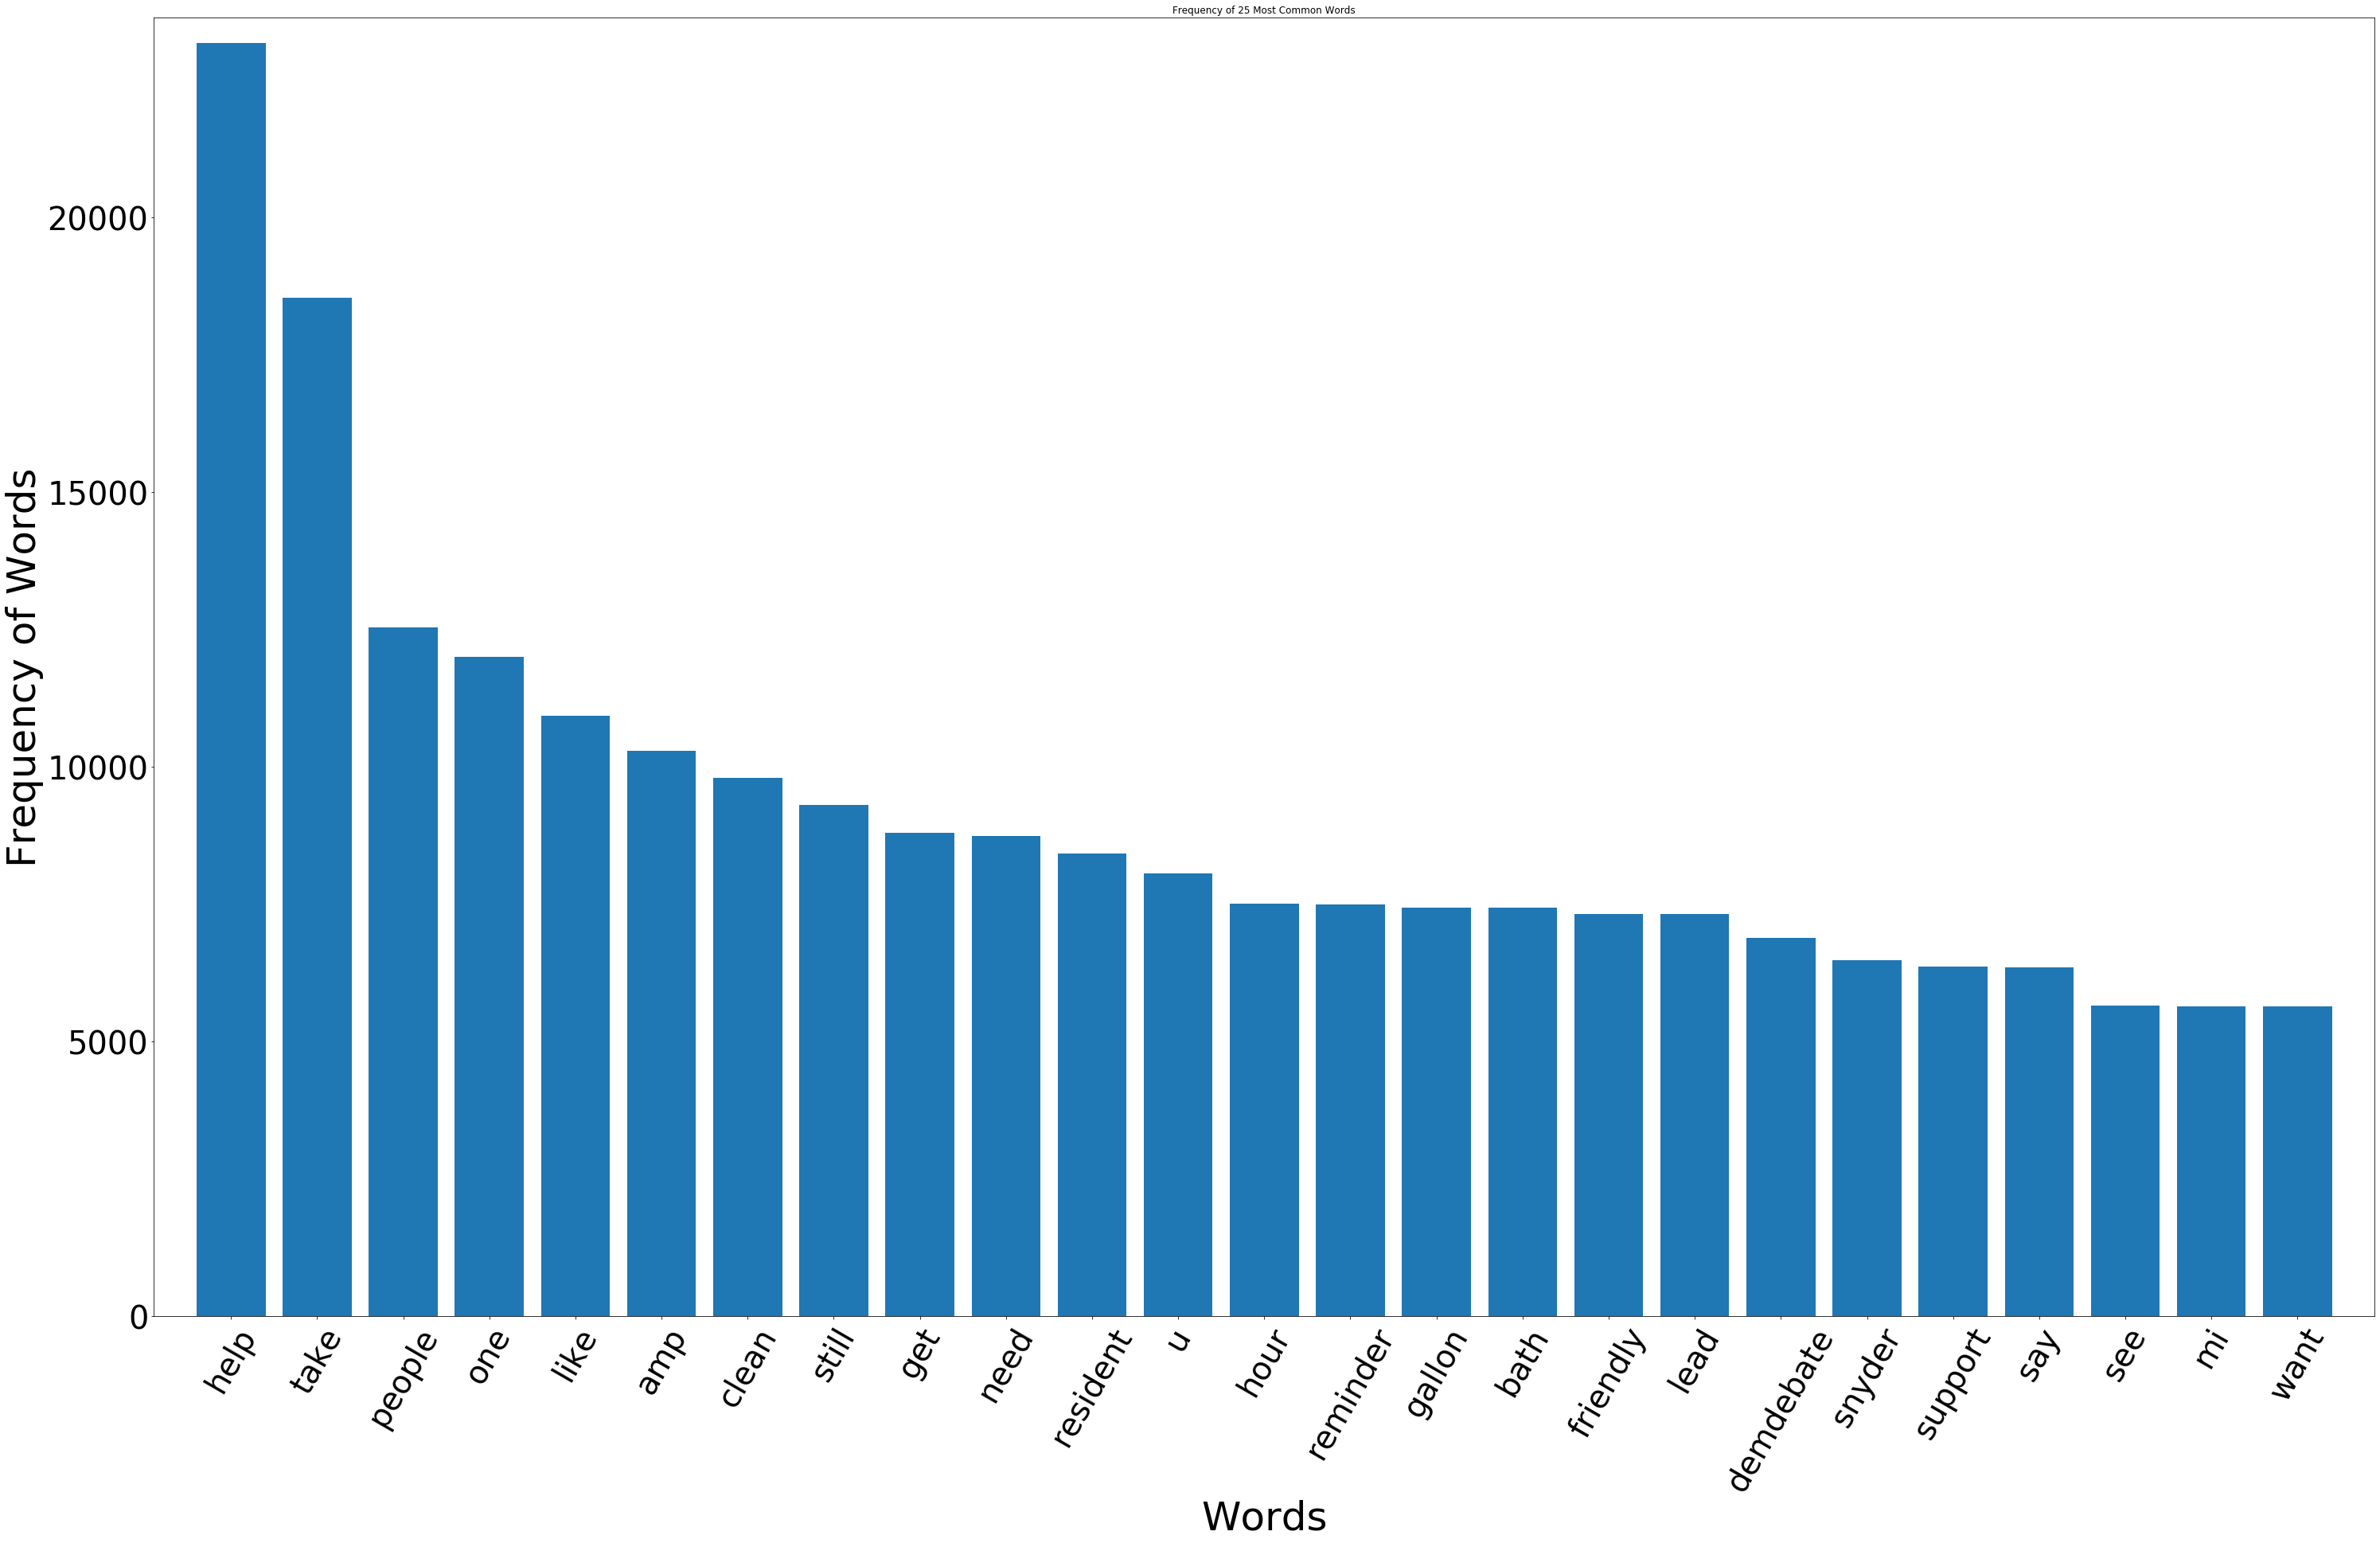

In [18]:
allwords = get_all_words(positive_sentiment_df)
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)

plt.figure(figsize=(50, 30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
f=plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words')
plt.show()

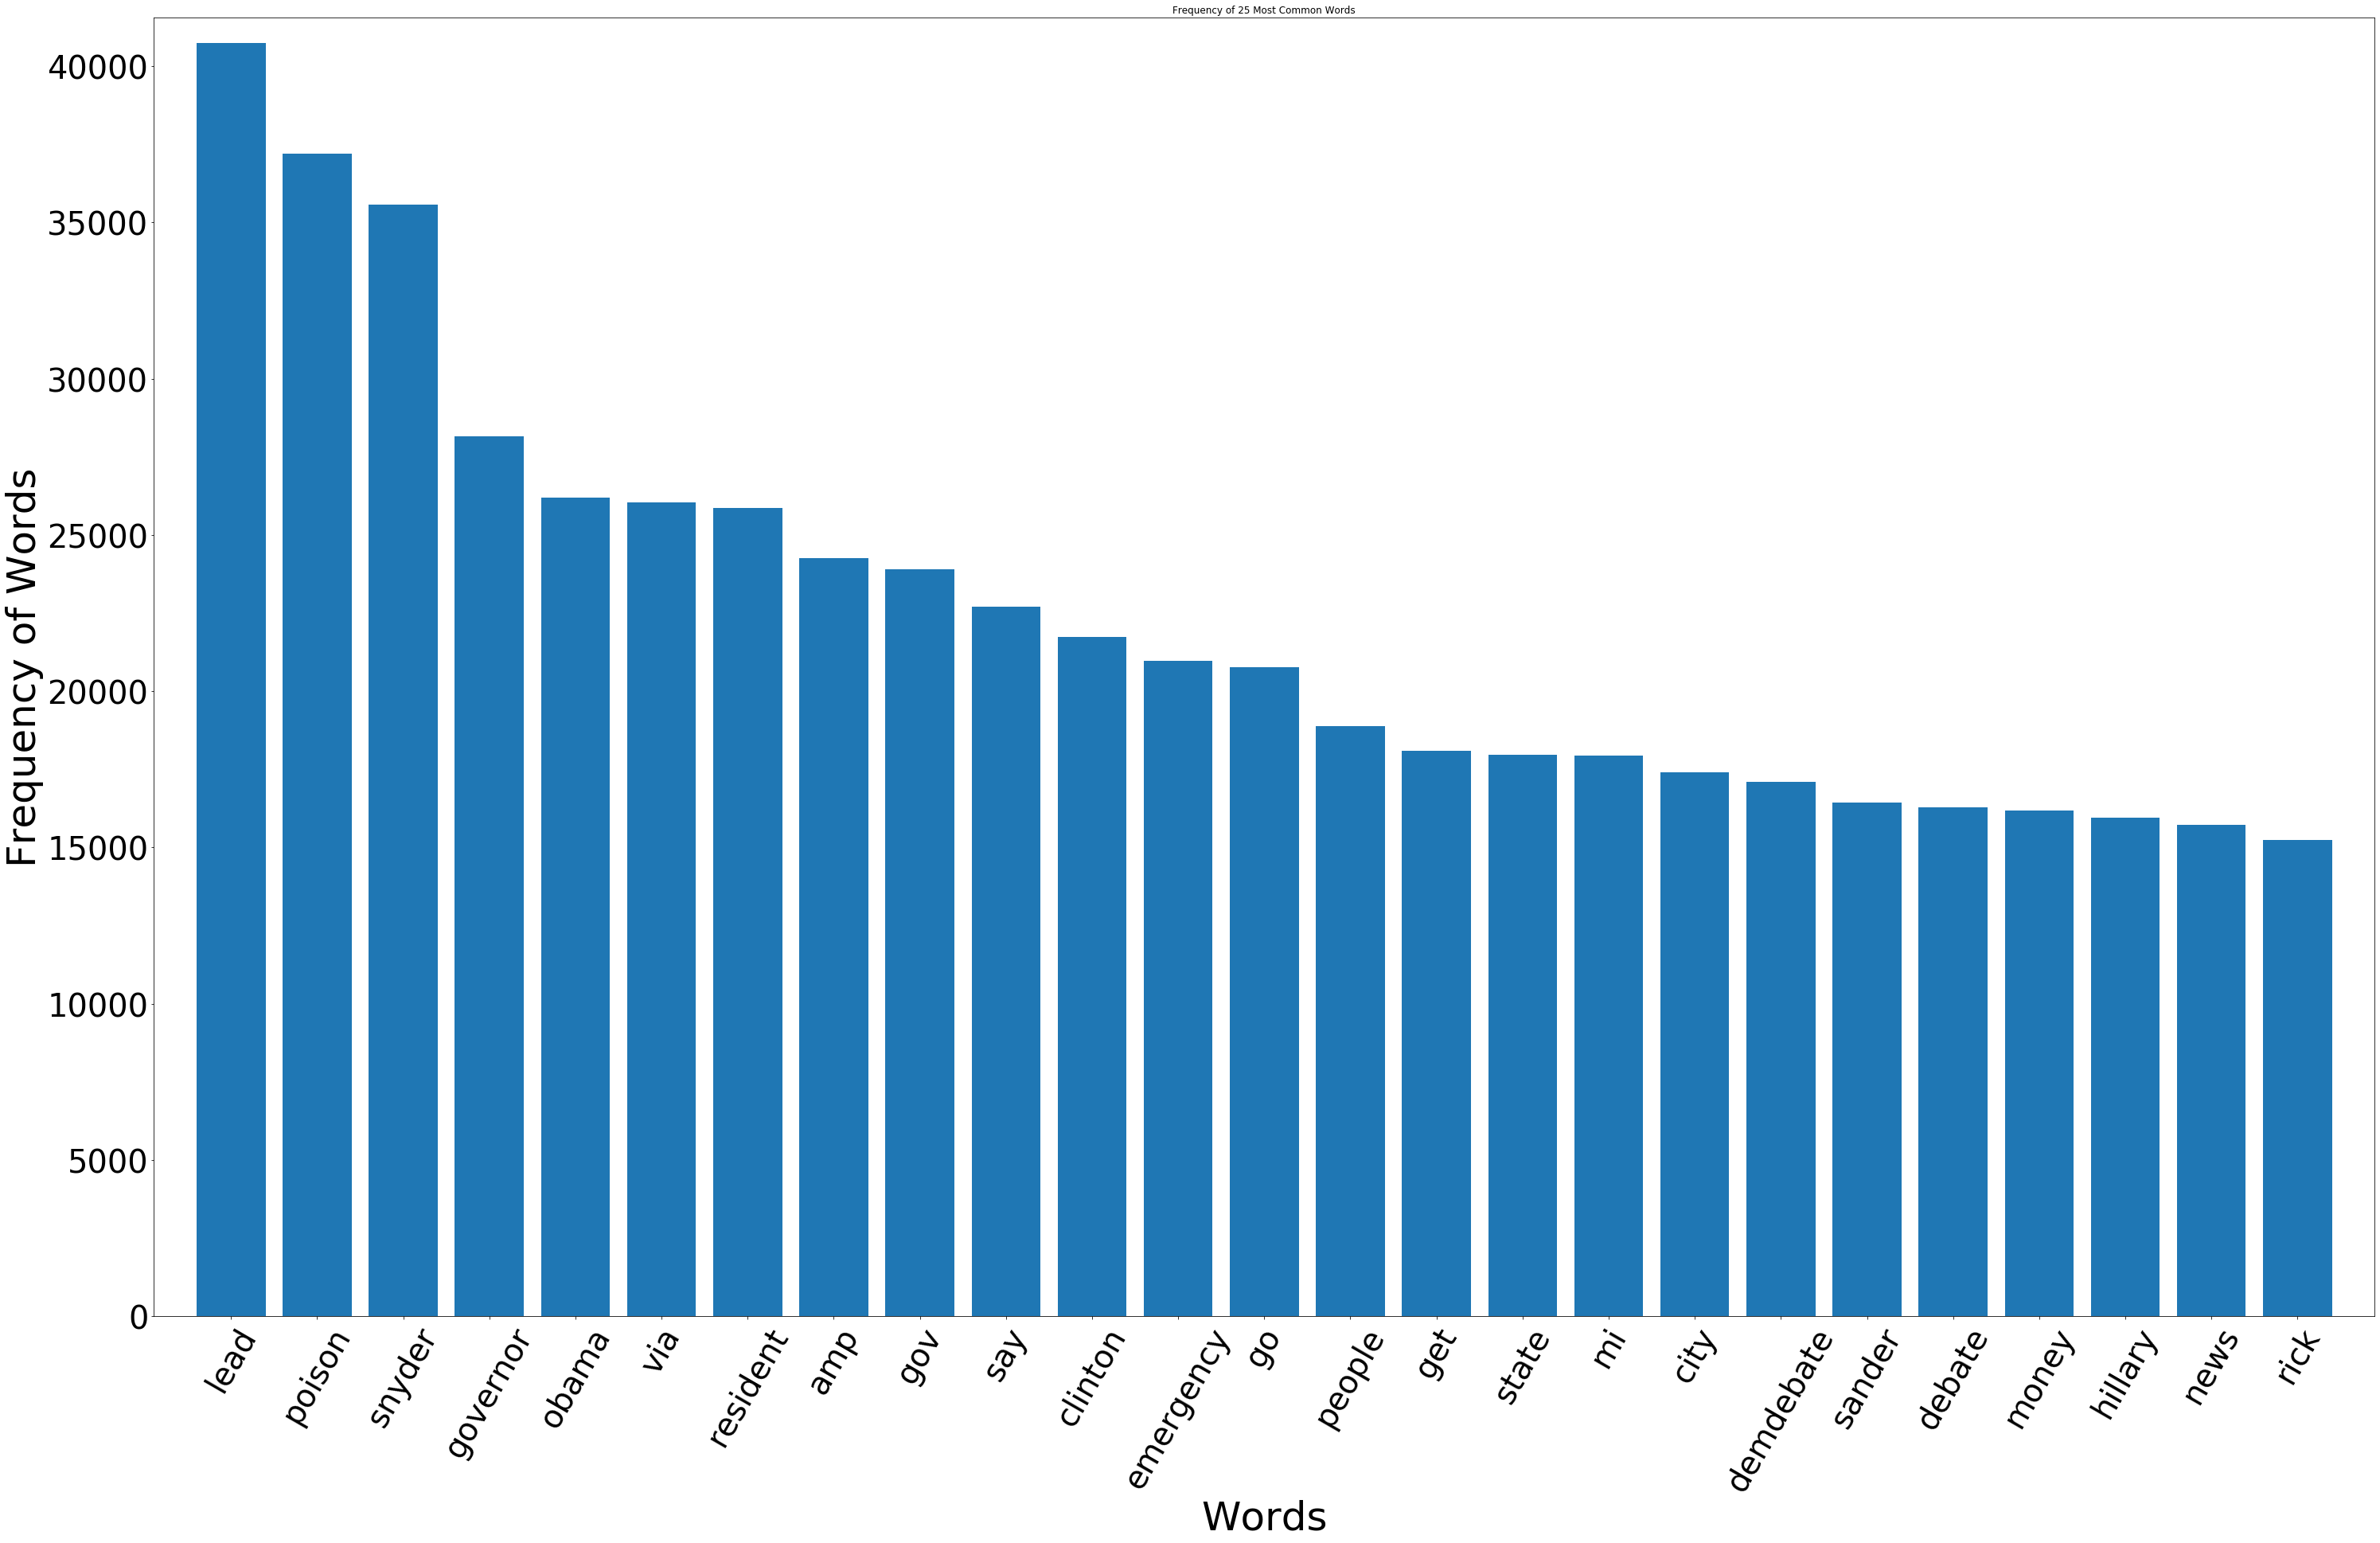

In [19]:
allwords = get_all_words(negative_sentiment_df)
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)

plt.figure(figsize=(50, 30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
f=plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words')
plt.show()

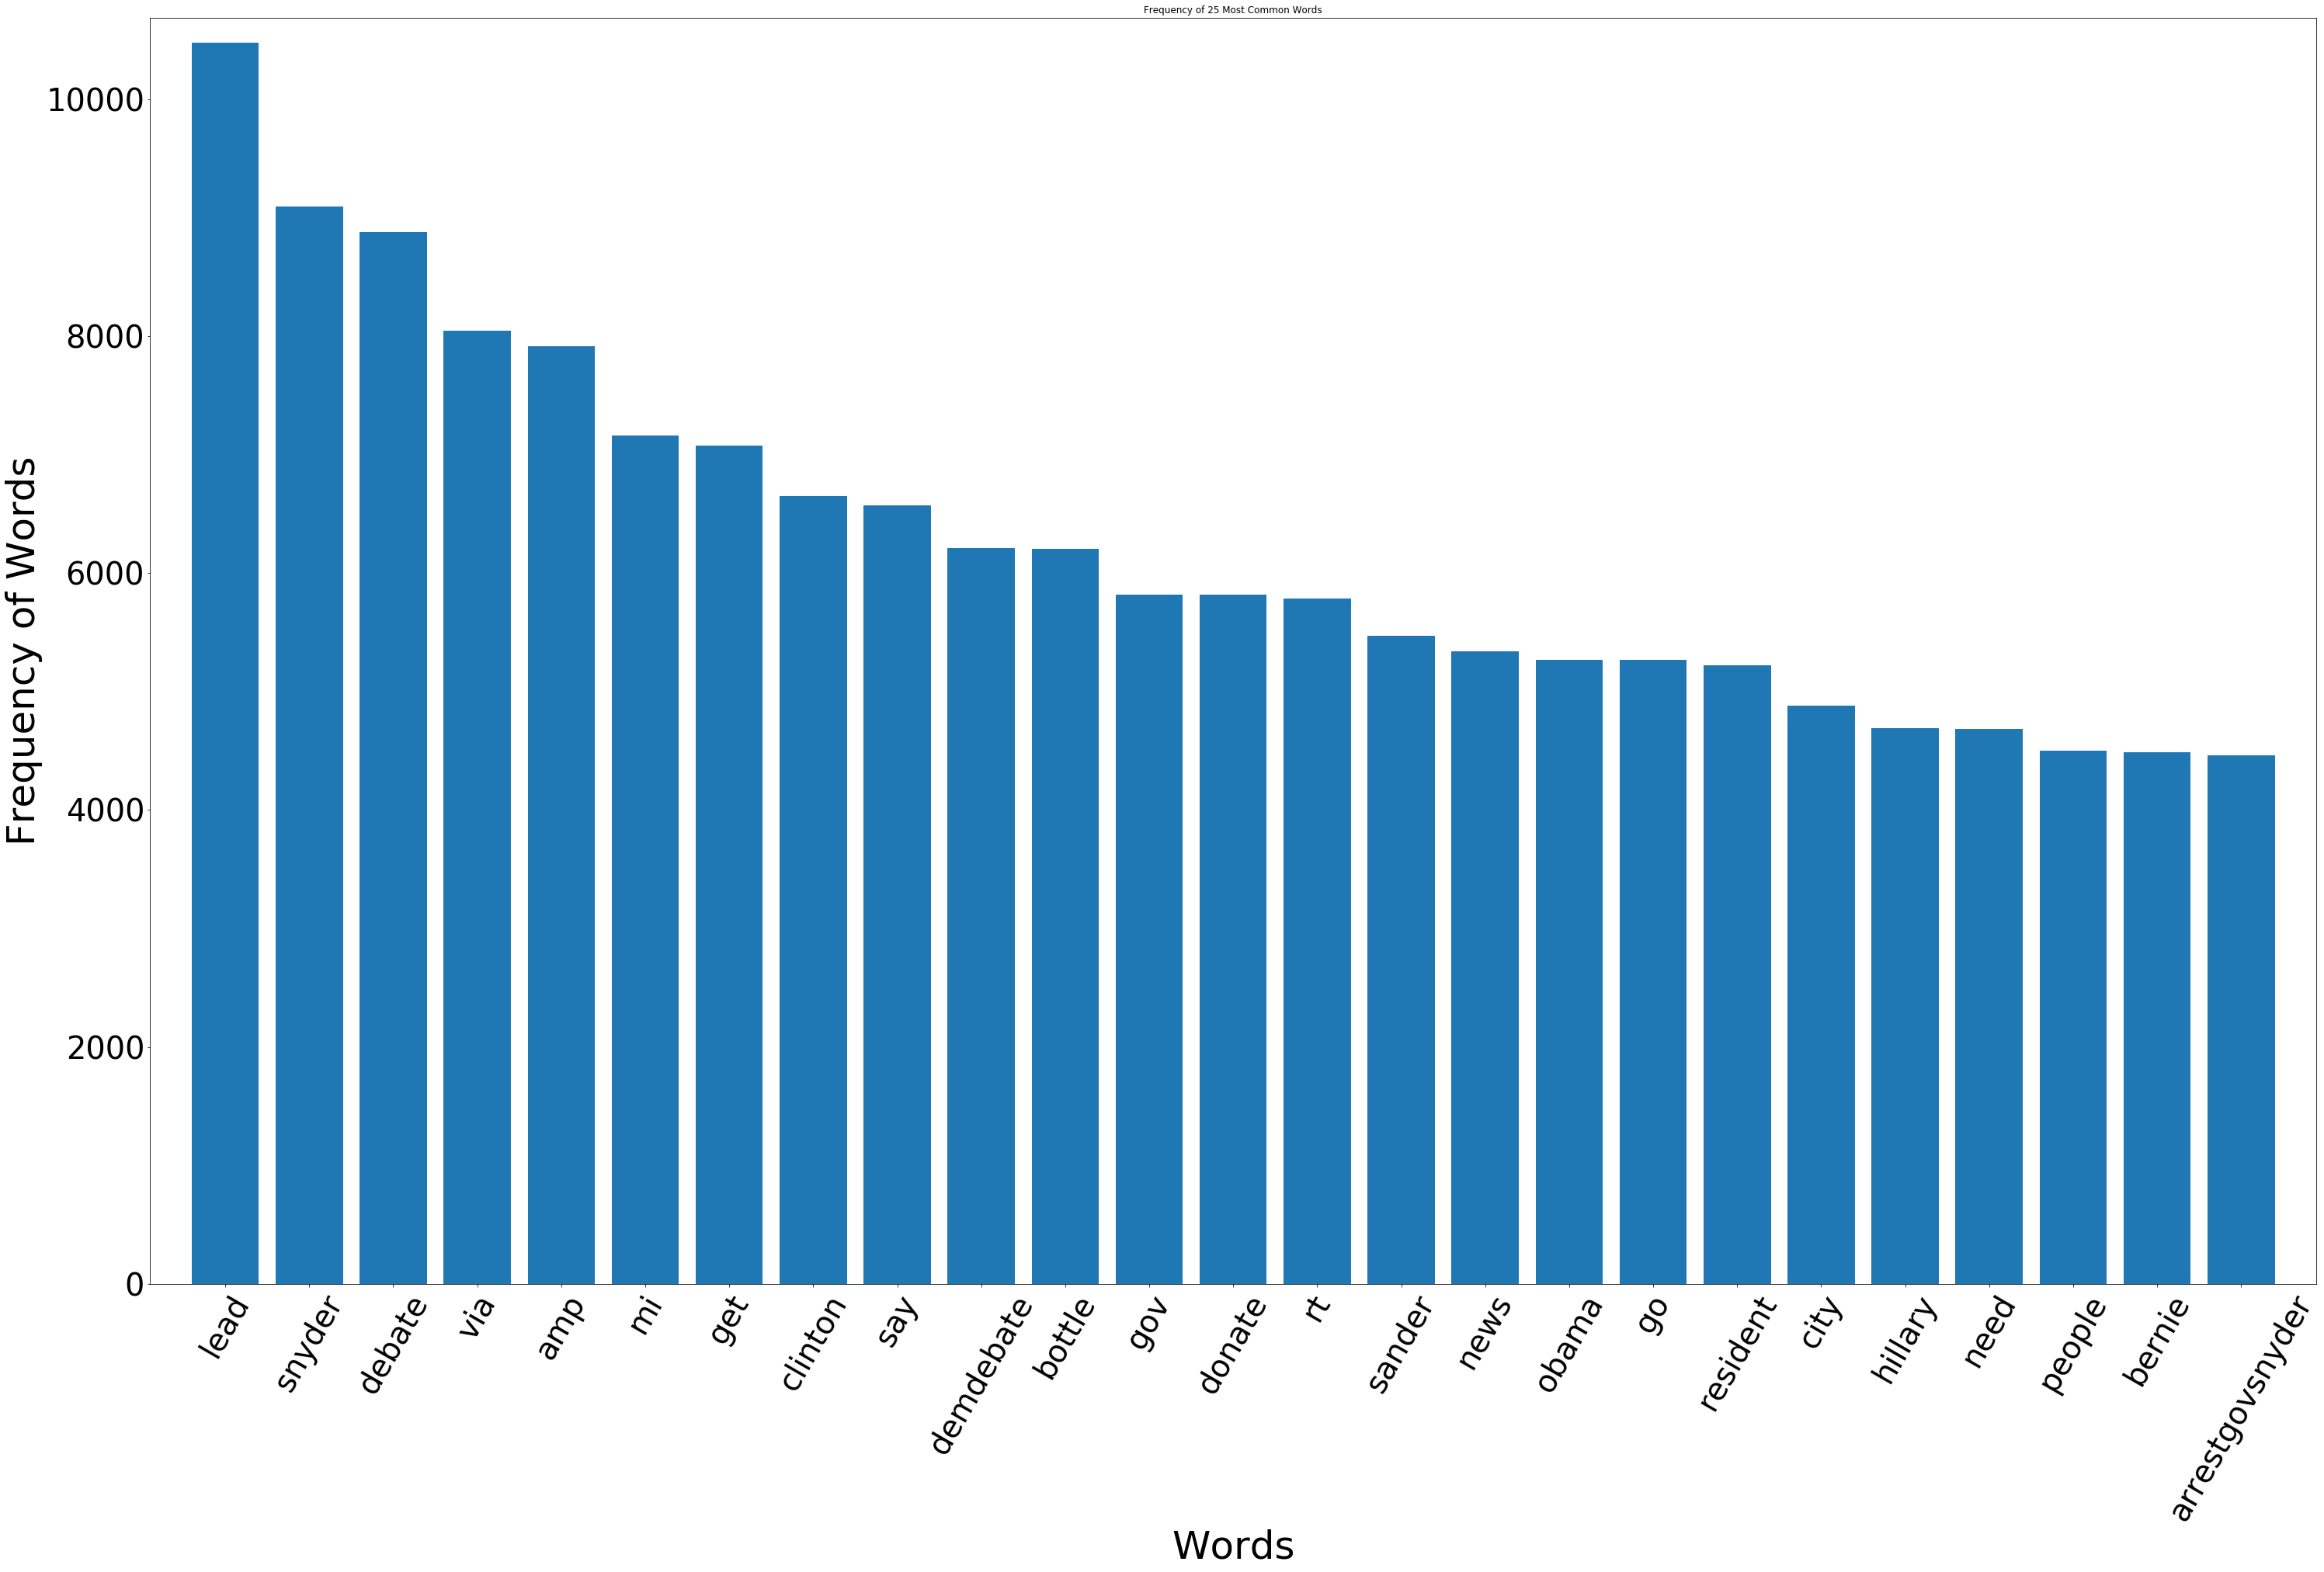

In [20]:
allwords = get_all_words(neutral_sentiment_df)
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)

plt.figure(figsize=(50, 30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
f=plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words')
plt.show()

In [21]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=1000)
tf = tf_vectorizer.fit_transform(cleaned_df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()

In [22]:
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,abc,absolutely,access,accountable,accuse,across,act,action,activist,actually,...,write,wrong,xiii,yall,year,yes,yet,young,youre,yr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=100, random_state=0).fit(tf)

In [25]:
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                           for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
http lead poison flint resident water money kid black new
Topic 1:
flint via city bottle reminder expose trump environmental de plan
Topic 2:
flint amp mi like make epa bernie much job gopdebate
Topic 3:
flint snyder gov obama michigan state water rick rt emergency
Topic 4:
take say go debate still hour family dont war demdebate
Topic 5:
flintwatercrisis tell day hold sign could petition politicize prevent accountable
Topic 6:
flint clinton hillary aid official bill million gop demdebate america
Topic 7:
flint water people get michigan child today drinking mayor drink
Topic 8:
flint water help one clean donate vote detroit republican use
Topic 9:
flint crisis water michigan governor need sander news call time


In [29]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne', sort_topics=True)
panel

/anaconda3/envs/py36/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
9      125.135803  132.011566       1        1  16.094354
4      -94.724419    7.107153       2        1  13.460182
3       84.354118  -73.777916       3        1  11.595836
2      137.224655   15.479068       4        1  11.210110
8      -23.457582   64.249832       5        1   9.950535
7       62.783066   70.295723       6        1   9.541258
6      -87.371178  124.591614       7        1   8.465884
0       16.717834  157.738220       8        1   7.489850
5      -33.578354  -75.404663       9        1   6.134351
1       24.752157   -7.447367      10        1   6.057639, topic_info=    Category           Freq              Term          Total  loglift  logprob
331  Default  194148.000000  flintwatercrisis  194148.000000  30.0000  30.0000
190  Default  152125.000000            crisis  152125.000000  29.0000  29.0000
959  Default  286475.000000             water  286475.000000  28.0000  28.0000
326  Default  567066.000000             flint  567066.000000  27.0000  27.0000
424  Default   51124.000000              http   51124.000000  26.0000  26.0000
..       ...            ...               ...            ...      ...      ...
998  Topic10    2711.664240             youre    2712.571461   2.8035  -4.7168
138  Topic10    2680.114381              cher    2681.021555   2.8035  -4.7285
13   Topic10    2533.760126    administration    2534.667381   2.8035  -4.7847
171  Topic10    2492.124733       contaminate    2493.031958   2.8035  -4.8012
326  Topic10   40266.958945             flint  567066.270339   0.1589  -2.0188

[358 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
3         9  0.999611     accountable
7         3  0.999873          action
13       10  0.999737  administration
22        7  0.999920             aid
25        2  0.999771             air
...     ...       ...             ...
991       1  0.999594           wrong
994       2  0.999905            year
995       9  0.999334             yes
996       6  0.999819             yet
998      10  0.999789           youre

[332 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 4, 3, 9, 8, 7, 1, 6, 2])

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(cleaned_df['lemma_str'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [38]:
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

,abc,absolutely,access,accountable,accuse,across,act,action,activist,actually,...,write,wrong,xiii,yall,year,yes,yet,young,youre,yr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
nmf = NMF(n_components=10, random_state=0, alpha=.1).fit(tfidf)

In [40]:
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
water crisis donate bottle flint via epa official million help
Topic 1:
flintwatercrisis arrestgovsnyder rt http help need amp flintwater petition donate
Topic 2:
take still one bath friendly gallon reminder hour water flint
Topic 3:
lead poison resident kid black poor http hospital water child
Topic 4:
money clean go war drinking much iraq enough somehow provide
Topic 5:
flint people mi help amp like see need look city
Topic 6:
obama emergency declare president sign state federal declaration order aid
Topic 7:
michigan governor flint resign must people state city leadpoisoning statement
Topic 8:
clinton sander hillary debate bernie demdebate call democratic get vote
Topic 9:
snyder gov rick resign call email snyders governor testify congress


In [53]:
nmf_topic_values = nmf.transform(tfidf)
cleaned_df['nmf_topics'] = nmf_topic_values.argmax(axis=1)
lda_topic_values = lda_model.transform(tf)
cleaned_df['lda_topics'] = lda_topic_values.argmax(axis=1)

In [54]:
lda_remap = {
    0: 'Poisoned black children',
    1: 'Flint exposes Trump\'s plan',
    2: '???? something about politics',
    3: 'Governor Snyder\'s state of emergency',
    4: '????',
    5: 'Politicization of Flint water crisis',
    6: 'Hilary Clinton aid plan for Flint',
    7: 'Children drinking Flint water',
    8: '???? something about Republican votes',
    9: 'Bernie Sanders blames Governor Snyder'
}

nmf_remap = {
    0: 'Donate to help water crisis',
    1: 'Arrest Governor Snyder',
    2: 'Conserve Water',
    3: 'Black children\'s water is poisoned',
    4: 'Not enough funding going to Flint water crisis',
    5: 'Help Flint people',
    6: 'President Obama declares emergency in Michigan',
    7: 'Governor Snyder should resign',
    8: 'Democratic debate for votes',
    9: 'Governor Snyder shoudl resign and testify in front of Congress'
}

In [55]:
cleaned_df['lda_topics'] = cleaned_df['lda_topics'].map(lda_remap)

In [56]:
cleaned_df['nmf_topics'] = cleaned_df['nmf_topics'].map(nmf_remap)

In [57]:
cleaned_df.head(15)

,created_at,followers,hashtagged,location,screen_name,text,verified,cleaned_tweets,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,sentiment,lemmatized_sentiment_vader_score,cleaned_tweets_sentiment_vader_score,original_tweets_vader_sentiment_score,nmf_topics,lda_topics
id,,,,,,,,,,,,,,,,,,,,
688103460634415104,2016-01-15 21:00:24,265,True,"Sugar Land, Texas",zachsciba,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da...",# flintwatercrisis could prevent easy day solu...,0.433333,0.6486,0.6486,0.6486,Arrest Governor Snyder,Politicization of Flint water crisis
688103392388882433,2016-01-15 21:00:07,968,True,None,scootey,You can thank the Republican party for this #M...,False,you can thank the republican party for this #m...,"[you, can, thank, the, republican, party, for,...","[thank, republican, party, #, michigan, #, fli...","[(thank, JJ), (republican, JJ), (party, NN), (...","[(thank, a), (republican, a), (party, n), (#, ...","[thank, republican, party, #, michigan, #, fli...",thank republican party # michigan # flintwater...,0.000000,0.6369,0.6369,0.6369,Governor Snyder should resign,Bernie Sanders blames Governor Snyder
688103487205322752,2016-01-15 21:00:30,189,True,"s. pasadena,ca",steve1204,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da...",# flintwatercrisis could prevent easy day solu...,0.433333,0.6486,0.6486,0.6486,Arrest Governor Snyder,Politicization of Flint water crisis
688103398462205952,2016-01-15 21:00:09,8053,True,"Lansing, Michigan",ProgressMich,Snyder still won’t say when he knew about #Fli...,False,snyder still wont say when he knew about #flin...,"[snyder, still, wont, say, when, he, knew, abo...","[snyder, still, wont, say, knew, #, flintwater...","[(snyder, NN), (still, RB), (wont, JJ), (say, ...","[(snyder, n), (still, r), (wont, a), (say, v),...","[snyder, still, wont, say, knew, #, flintwater...",snyder still wont say knew # flintwatercrisis ...,0.000000,-0.3612,-0.3612,-0.3612,Governor Snyder shoudl resign and testify in f...,????
688103509611294721,2016-01-15 21:00:35,7,True,None,marcgilbert77,RT @TheDailyShow: #FlintWaterCrisis could have...,False,#flintwatercrisis could have been prevented by...,"[#, flintwatercrisis, could, have, been, preve...","[#, flintwatercrisis, could, prevented, easy, ...","[(#, #), (flintwatercrisis, NN), (could, MD), ...","[(#, n), (flintwatercrisis, n), (could, n), (p...","[#, flintwatercrisis, could, prevent, easy, da...",# flintwatercrisis could prevent easy day solu...,0.433333,0.6486,0.6486,0.6486,Arrest Governor Snyder,Politicization of Flint water crisis
688103421811896321,2016-01-15 21:00:14,589,False,None,porridgeisgood,RT @democracynow: Flint Doctor @MonaHannaA on ...,False,flint doctor on how she fought govt denials to...,"[flint, doctor, on, how, she, fought, govt, de...","[flint, doctor, fought, govt, denials, expose,...","[(flint, NN), (doctor, NN), (fought, VBD), (go...","[(flint, n), (doctor, n), (fought, v), (govt, ...","[flint, doctor, fight, govt, denial, expose, p...",flint doctor fight govt denial expose poison c...,0.000000,-0.7717,-0.7717,-0.7717,Black children's water is poisoned,Flint exposes Trump's plan
688103585373016066,2016-01-15 21:00:53,4323,False,In own world,winn1_winn,RT @coton_luver: #RickSnyder Flint Republicans...,False,#ricksnyder flint republicans r sending shutof...,"[#, ricksnyder, flint, rep

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]), <a list of 9 Text xticklabel objects>)

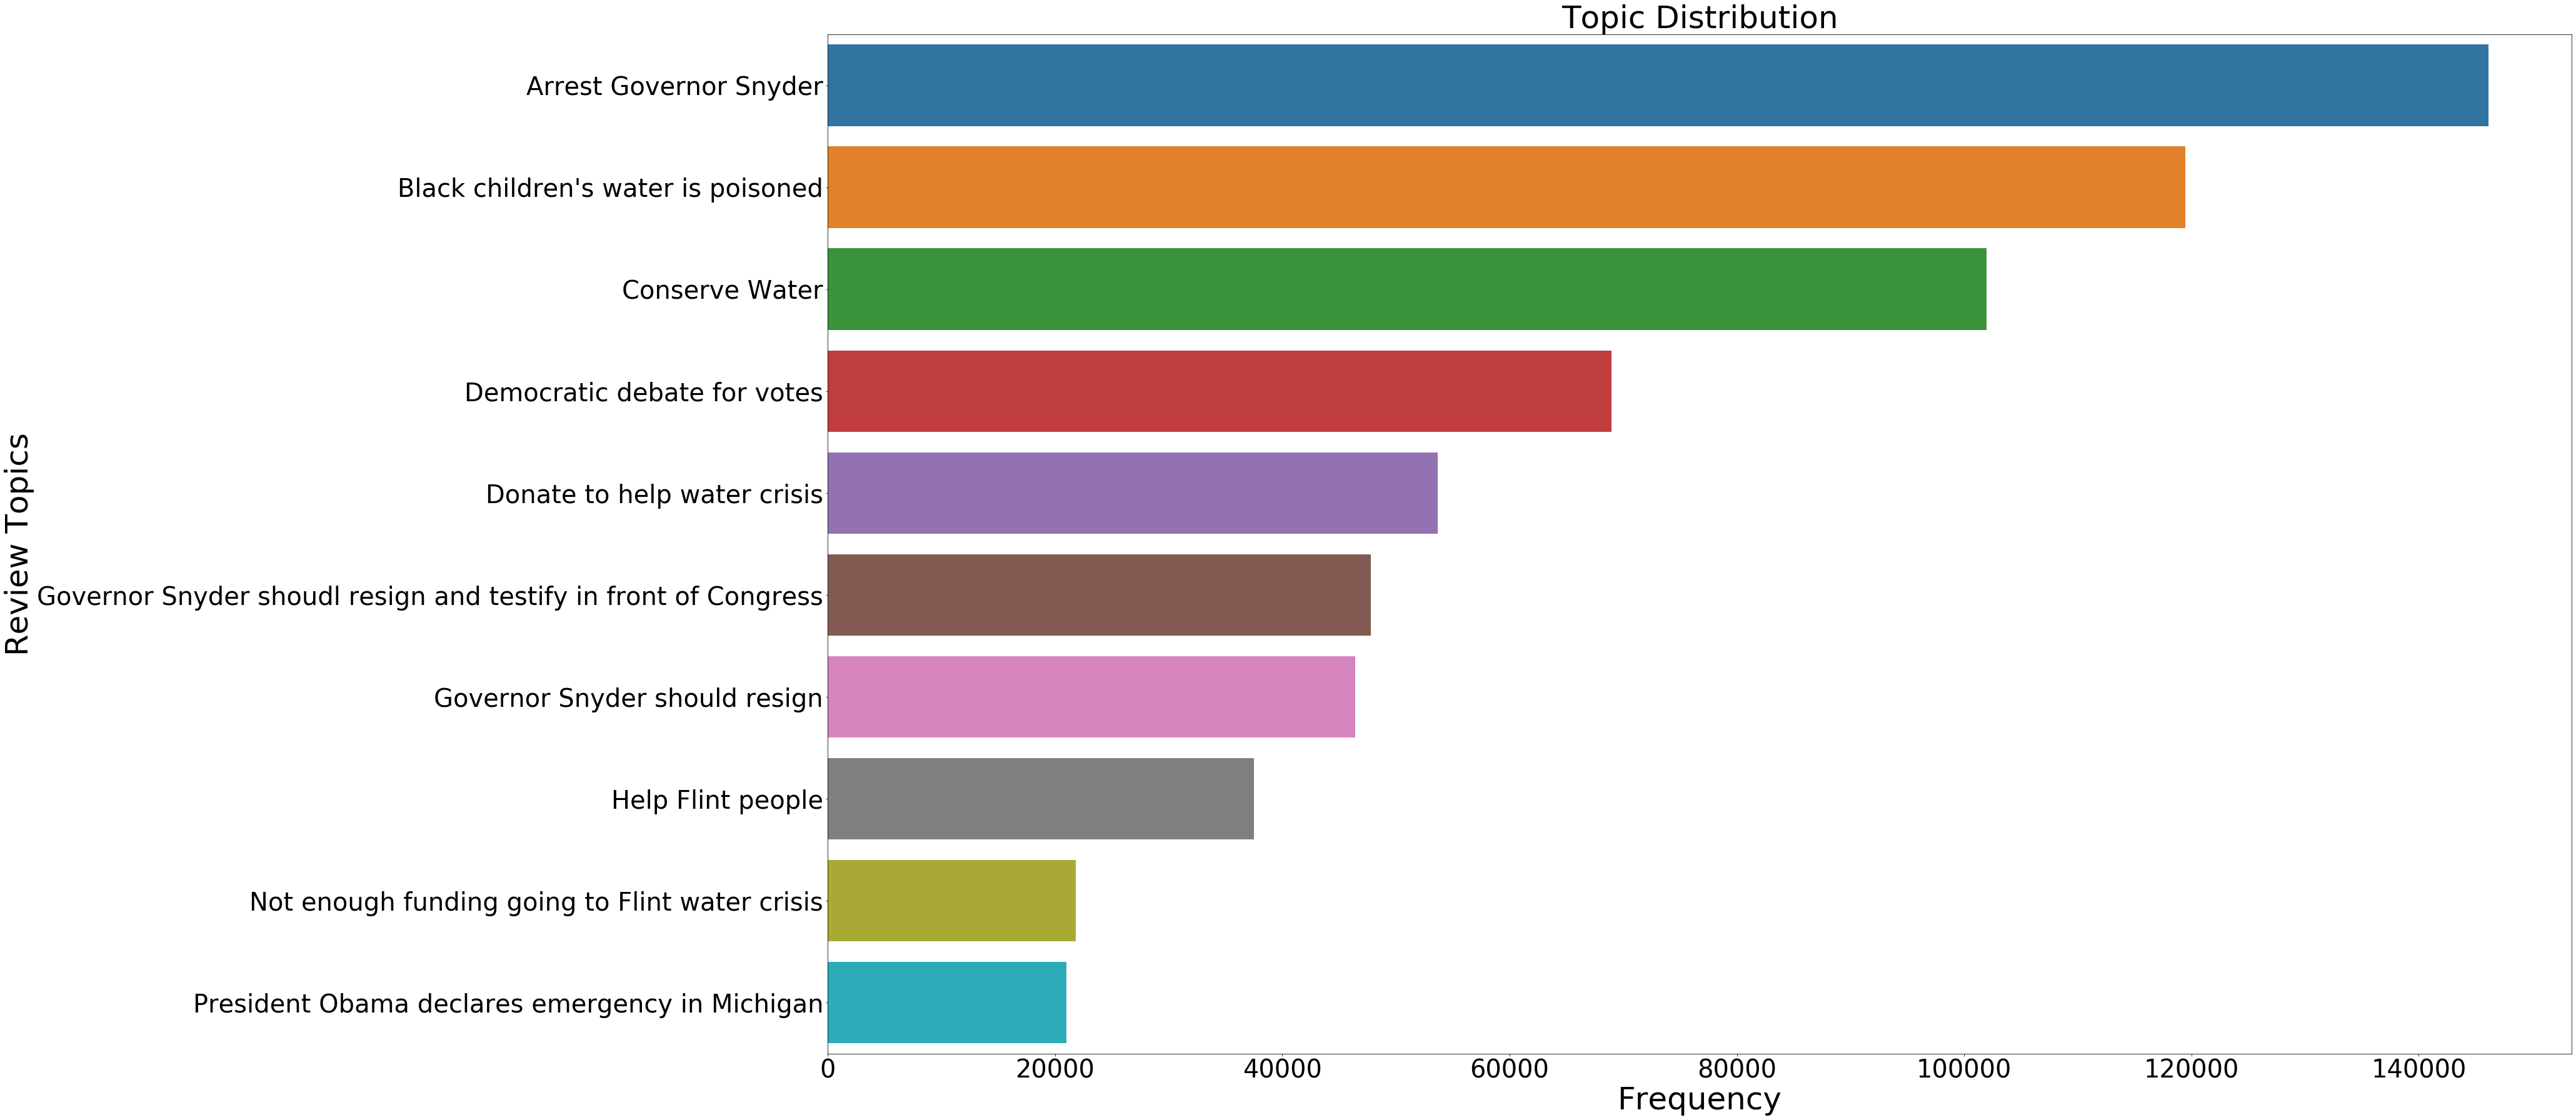

In [59]:
import seaborn as sns

nmf_x = cleaned_df.nmf_topics.value_counts()
nmf_y = nmf_x.sort_index()
plt.figure(figsize=(50, 30))
sns.barplot(nmf_x, nmf_y.index)
plt.title("Topic Distribution", fontsize=50)
plt.ylabel("Review Topics", fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Frequency', fontsize=50)
plt.xticks(fontsize=40)

In [63]:
positive_sentiment_df = cleaned_df[cleaned_df['lemmatized_sentiment_vader_score'] >= 0.05]
negative_sentiment_df = cleaned_df[cleaned_df['lemmatized_sentiment_vader_score'] <= 0.05]

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 7 Text xticklabel objects>)

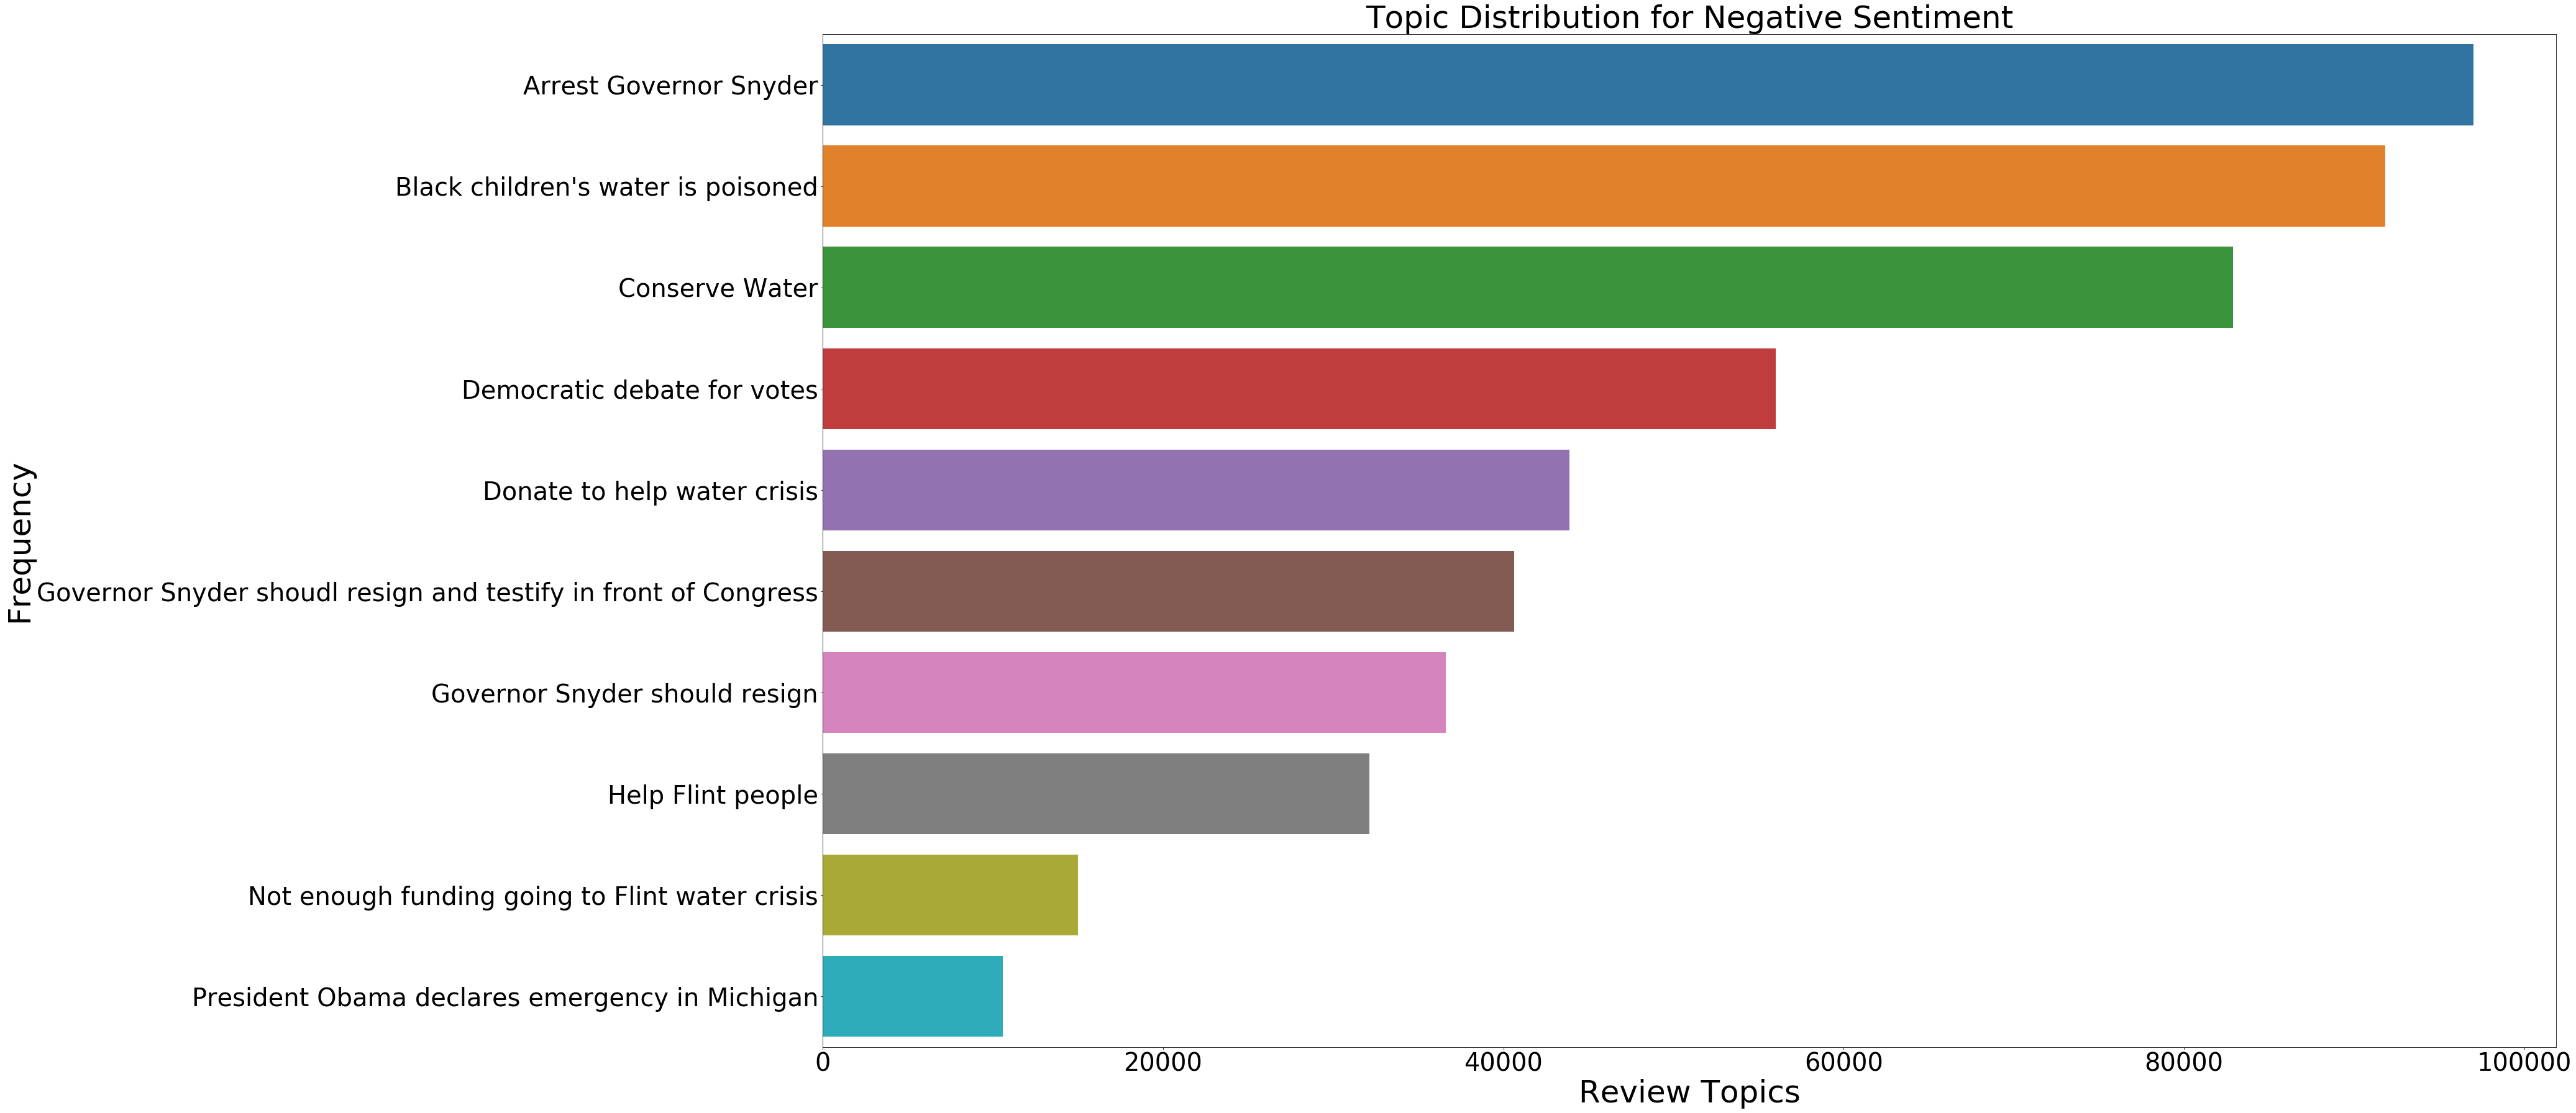

In [64]:
nmf_low_x = negative_sentiment_df.nmf_topics.value_counts()
nmf_low_y = nmf_low_x.sort_index()
plt.figure(figsize=(50, 30))
sns.barplot(nmf_low_x, nmf_low_y.index)
plt.title("Topic Distribution for Negative Sentiment", fontsize=50)
plt.ylabel("Frequency", fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel("Review Topics", fontsize=50)
plt.xticks(fontsize=40)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 <a list of 7 Text xticklabel objects>)

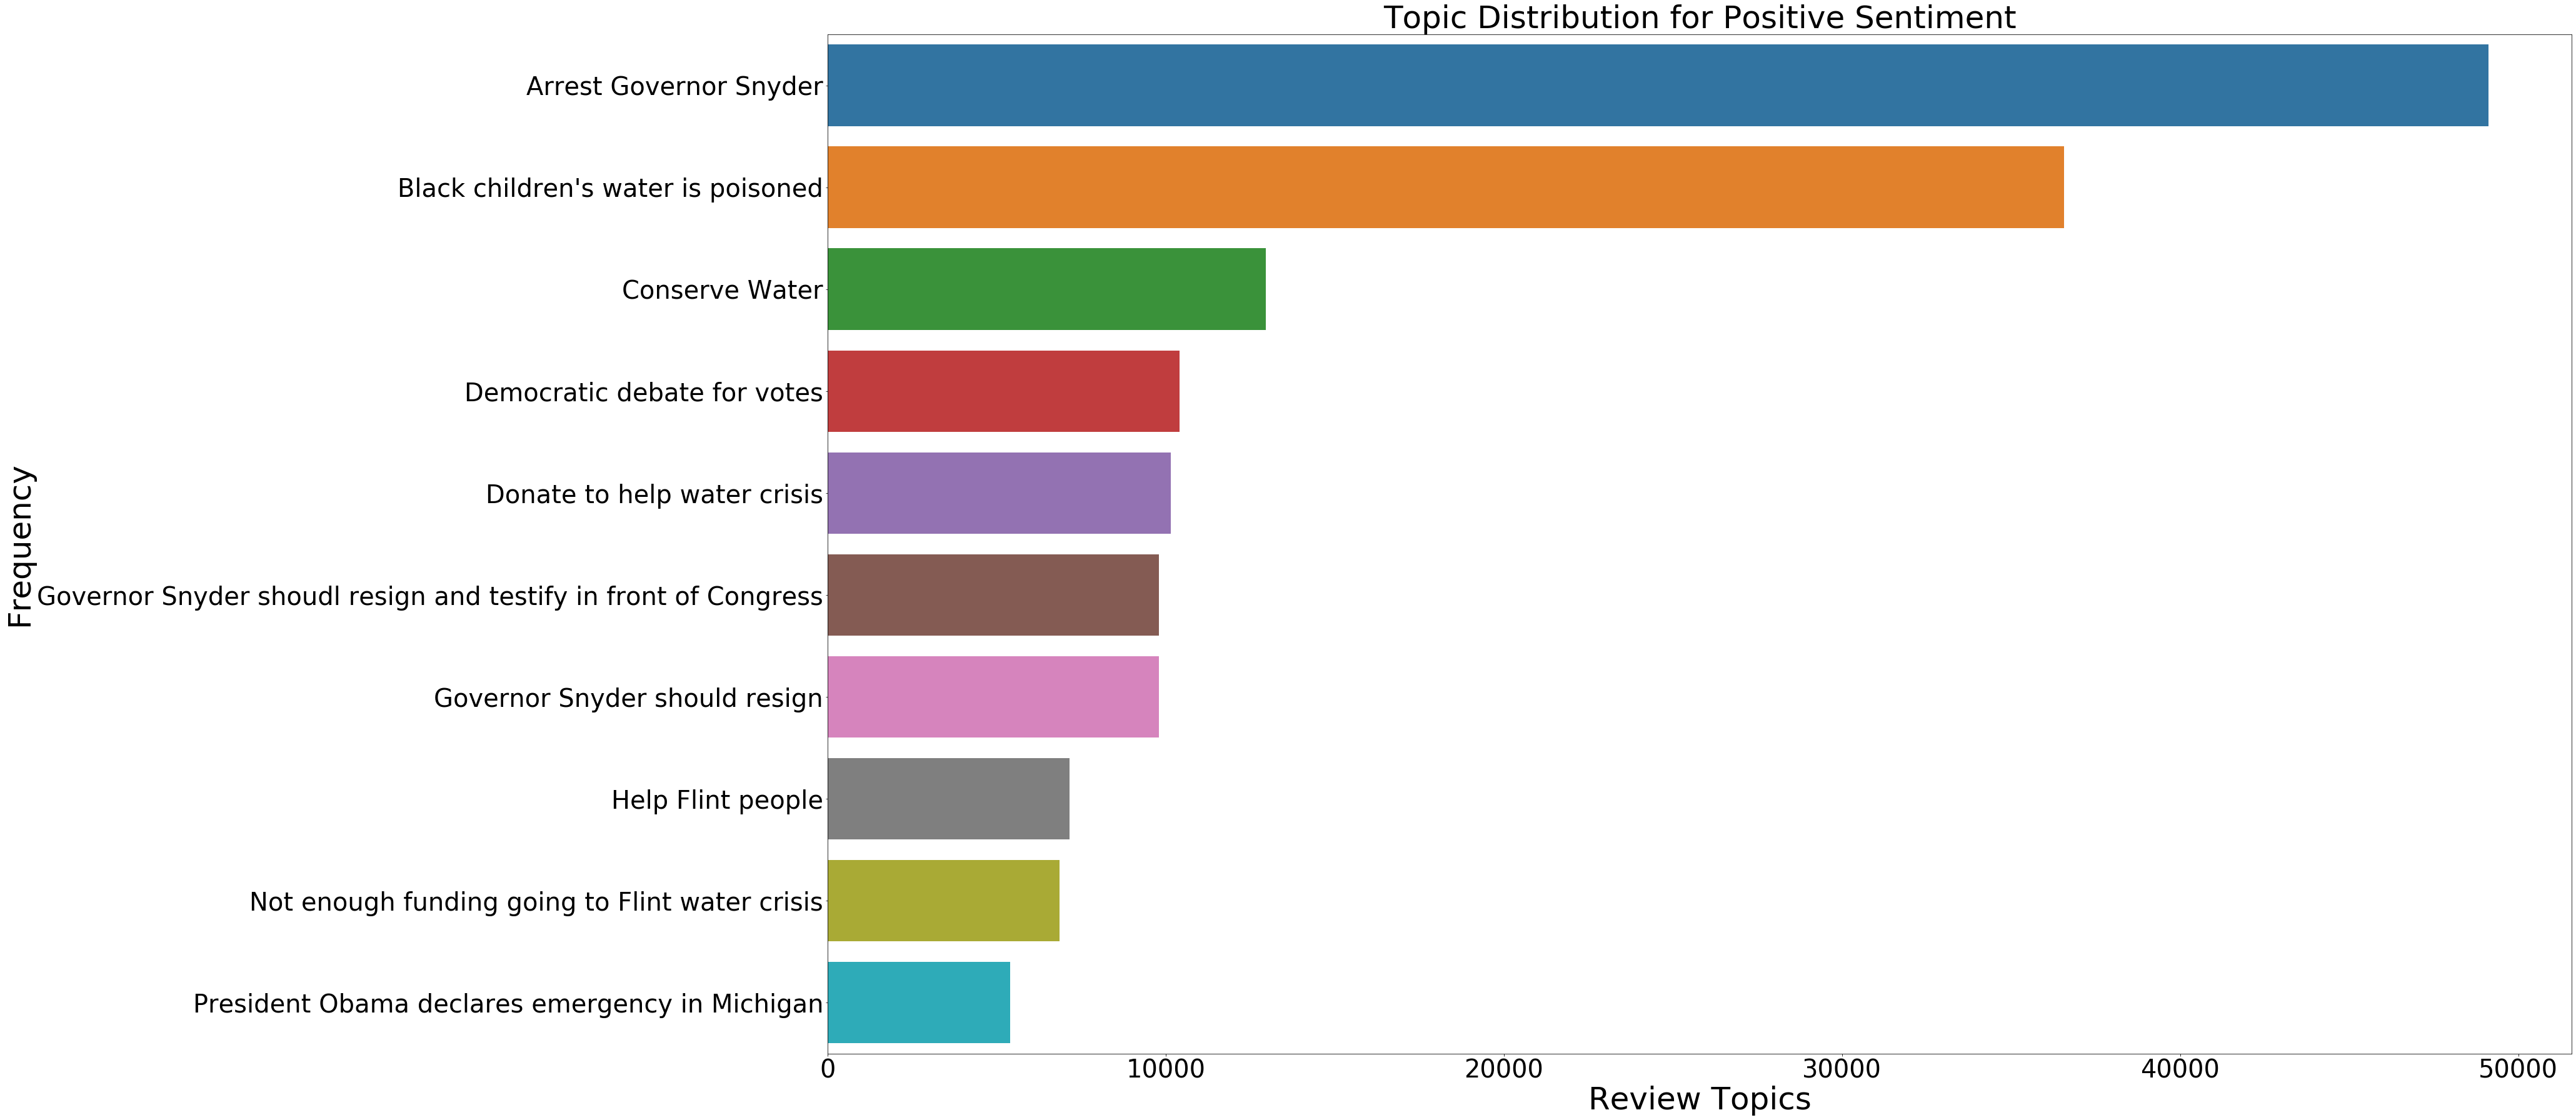

In [65]:
nmf_high_x = positive_sentiment_df.nmf_topics.value_counts()
nmf_high_y = nmf_high_x.sort_index()
plt.figure(figsize=(50, 30))
sns.barplot(nmf_high_x, nmf_high_y.index)
plt.title("Topic Distribution for Positive Sentiment", fontsize=50)
plt.ylabel("Frequency", fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel("Review Topics", fontsize=50)
plt.xticks(fontsize=40)